In [1]:
from sklearn.datasets import fetch_openml 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import time
import random
import sys

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
import multiprocessing
n_jobs=multiprocessing.cpu_count()-1

In [4]:
#echantillon = np.savetxt('./sous-ensemble.txt', echantillon, fmt='%d')
echantillon = np.loadtxt('./sous-ensemble.txt', dtype=int)
jeu = mnist.data[echantillon]
jeu_target=mnist.target[echantillon]

X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
                train_size = 0.7,test_size=0.3, random_state=42)
print(len(X_train))
print(len(X_test))
print(X_train.shape)

3500
1500
(3500, 784)


In [5]:
clf = MLPClassifier(hidden_layer_sizes=(50))

In [6]:
clf.fit(X_train, y_train)
y_pr=clf.predict(X_test)
class_test_4 = clf.predict(X_test)
class_reel_4 = y_test[4]
print(class_test_4[4])
print(class_reel_4)

3
3


In [7]:
score = precision_score(y_test,y_pr,average=None)
print(score)
print(len(y_pr))
score = precision_score(y_test,y_pr,average="micro")
print(score)
print(len(y_pr))

[0.87417219 0.90116279 0.83125    0.85534591 0.87837838 0.75193798
 0.90540541 0.81481481 0.77862595 0.8       ]
1500
0.842
1500


In [8]:
taille = []
scores = []
y_preds =[]
for i in range(1,101):
    randnums= np.random.randint(1,20,i)
    tuple_size=tuple(50 for e in randnums)
    
    clf = MLPClassifier(hidden_layer_sizes=tuple_size)
    clf.fit(X_train, y_train)
    y_pr=clf.predict(X_test)
    
    score = precision_score(y_test,y_pr,average="micro")
    
    taille.append(i)
    y_preds.append(y_pr)
    scores.append(score)
    
    print(i," ",score)

1   0.8406666666666667
2   0.8046666666666666
3   0.8186666666666667
4   0.8313333333333334
5   0.8533333333333334
6   0.872
7   0.8833333333333333
8   0.8893333333333333
9   0.9013333333333333
10   0.9
11   0.9013333333333333
12   0.9046666666666666
13   0.9026666666666666
14   0.9133333333333333
15   0.9086666666666666
16   0.9
17   0.916
18   0.9093333333333333
19   0.91
20   0.8933333333333333
21   0.9166666666666666
22   0.9066666666666666
23   0.888
24   0.9013333333333333
25   0.9073333333333333
26   0.894
27   0.9053333333333333
28   0.8966666666666666
29   0.7386666666666667
30   0.8826666666666667
31   0.904
32   0.872
33   0.6793333333333333
34   0.6746666666666666
35   0.87
36   0.722
37   0.78
38   0.8093333333333333
39   0.8546666666666667
40   0.5353333333333333
41   0.5986666666666667
42   0.562
43   0.6533333333333333
44   0.7973333333333333
45   0.6753333333333333
46   0.6593333333333333
47   0.7946666666666666
48   0.10666666666666667
49   0.6806666666666666
50   0.1

In [9]:
taille_10 = []
scores_10 = []
y_preds_10 =[]
times_10 = []
neurones = []
for i in range(1,11):
    randnums= np.random.randint(10,300,i)
    tuple_size=tuple(50 for e in randnums)
    
    starttime = time.time()
    
    clf = MLPClassifier(hidden_layer_sizes=tuple_size)
    clf.fit(X_train, y_train)
    y_pr=clf.predict(X_test)
    
    endtime = time.time() 
    
    score = precision_score(y_test,y_pr,average="micro")
    
    taille_10.append(i)
    y_preds_10.append(y_pr)
    scores_10.append(score)
    neurones.append(tuple_size)
    times_10.append(round((endtime - starttime)*1000,2))
    
    print(i," ",score)

1   0.8293333333333334
2   0.8573333333333333
3   0.8346666666666667
4   0.8346666666666667
5   0.868
6   0.862
7   0.88
8   0.894
9   0.8913333333333333
10   0.8953333333333333


In [24]:
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import time
import random
import sys

In [26]:
solvers=['lbfgs', 'sgd', 'adam']
times_kernel = []
score_kernel = []
rappels_kernel = []
accuracys_kernel =[]
erreur_kernel=[]
for sol in solvers:
    starttime = time.time()
    clf = MLPClassifier(solver=sol)
    clf.fit(X_train, y_train)
    predicted=clf.predict(X_test)
    
    endtime = time.time() 
    times_kernel.append(round((endtime - starttime)*1000,2))
    
    accuracy = clf.score(X_train, y_train)
    accuracys_kernel.append(1.0-accuracy)
    
    score = precision_score(y_test, predicted,average='micro')
    score_kernel.append(score)
    
    rappel_score = recall_score(y_test, predicted,average='micro')
    rappels_kernel.append(rappel_score)
    
    erreur=zero_one_loss(y_test, predicted)
    erreur_kernel.append(erreur)
    
    print(sol," ",score)

lbfgs   0.8933333333333333


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


sgd   0.6506666666666666
adam   0.8646666666666667


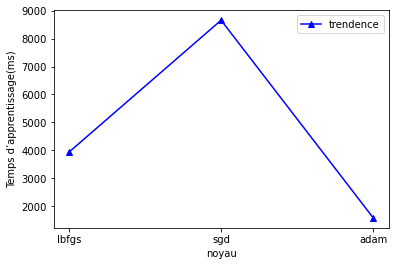

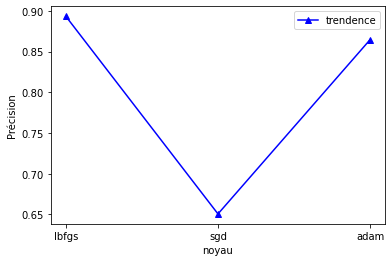

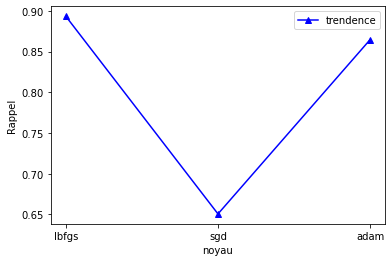

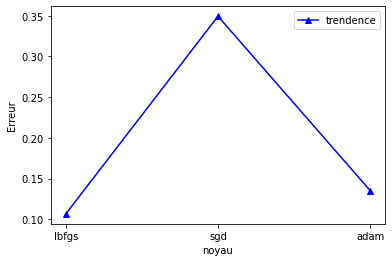

[0.10666666666666669, 0.3493333333333334, 0.1353333333333333]

In [27]:
plt.plot(solvers,times_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Temps d’apprentissage(ms)')
plt.show()

plt.plot(solvers,score_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Précision')
plt.show()

plt.plot(solvers,rappels_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Rappel')
plt.show()

plt.plot(solvers,erreur_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Erreur')
plt.show()

erreur_kernel

In [28]:
activations=['identity', 'logistic', 'tanh', 'relu']
times_kernel = []
score_kernel = []
rappels_kernel = []
accuracys_kernel =[]
erreur_kernel=[]
for act in activations:
    starttime = time.time()
    clf = MLPClassifier(activation=act)
    clf.fit(X_train, y_train)
    predicted=clf.predict(X_test)
    
    endtime = time.time() 
    times_kernel.append(round((endtime - starttime)*1000,2))
    
    accuracy = clf.score(X_train, y_train)
    accuracys_kernel.append(1.0-accuracy)
    
    score = precision_score(y_test, predicted,average='micro')
    score_kernel.append(score)
    
    rappel_score = recall_score(y_test, predicted,average='micro')
    rappels_kernel.append(rappel_score)
    
    erreur=zero_one_loss(y_test, predicted)
    erreur_kernel.append(erreur)
    
    print(act," ",score)

identity   0.856
logistic   0.9166666666666666
tanh   0.8933333333333333
relu   0.8466666666666667


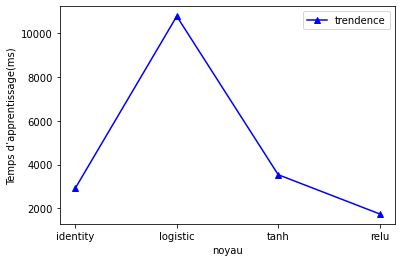

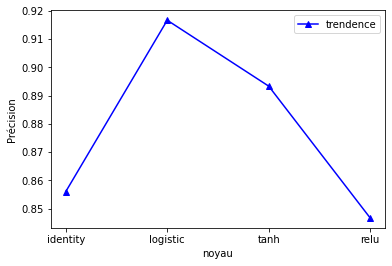

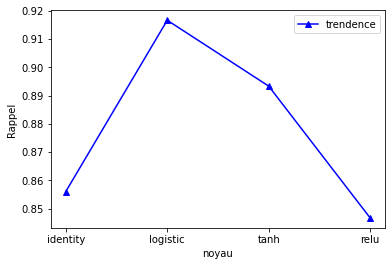

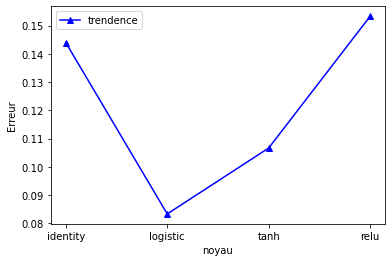

In [29]:
plt.plot(activations,times_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Temps d’apprentissage(ms)')
plt.show()

plt.plot(activations,score_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Précision')
plt.show()

plt.plot(activations,rappels_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Rappel')
plt.show()

plt.plot(activations,erreur_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Erreur')
plt.show()

In [18]:
print(np.arange (-5, 5,dtype  = float))
#C=10 ** c

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


In [30]:
alphas=np.arange (-5, 6,dtype  = float)
times_kernel = []
score_kernel = []
rappels_kernel = []
accuracys_kernel =[]
erreur_kernel=[]
for l in alphas:
    starttime = time.time()
    clf = MLPClassifier(alpha=10 ** l)
    clf.fit(X_train, y_train)
    predicted=clf.predict(X_test)
    
    endtime = time.time() 
    times_kernel.append(round((endtime - starttime)*1000,2))
    
    accuracy = clf.score(X_train, y_train)
    accuracys_kernel.append(1.0-accuracy)
    
    score = precision_score(y_test, predicted,average='micro')
    score_kernel.append(score)
    
    rappel_score = recall_score(y_test, predicted,average='micro')
    rappels_kernel.append(rappel_score)
    
    erreur=zero_one_loss(y_test, predicted)
    erreur_kernel.append(erreur)
    
    print(l," ",score)

-5.0   0.858
-4.0   0.8713333333333333
-3.0   0.8626666666666667
-2.0   0.8506666666666667
-1.0   0.8553333333333333
0.0   0.8726666666666667


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0   0.9046666666666666
2.0   0.9293333333333333
3.0   0.8906666666666667
4.0   0.7226666666666667
5.0   0.10666666666666667


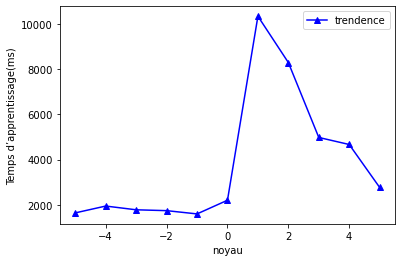

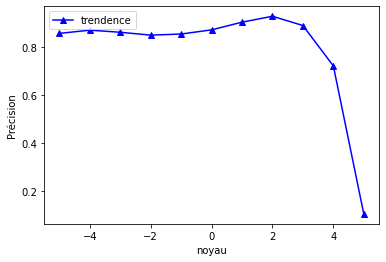

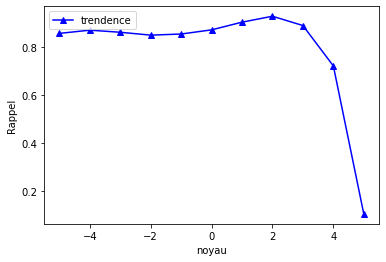

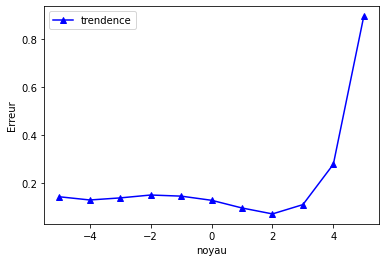

In [31]:
plt.plot(alphas,times_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Temps d’apprentissage(ms)')
plt.show()

plt.plot(alphas,score_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Précision')
plt.show()

plt.plot(alphas,rappels_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Rappel')
plt.show()

plt.plot(alphas,erreur_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Erreur')
plt.show()